In [20]:
project_id = '35ab48bb-4dd4-47ce-85f4-ac7a4c6778b9'
cv_key = '8dd995e24a29405a91444d875759825d'
cv_endpoint = 'https://interntask4car-prediction.cognitiveservices.azure.com/'

model_name = 'Iteration4' 
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model Iteration4 in project 35ab48bb-4dd4-47ce-85f4-ac7a4c6778b9


Classifying images in test image ...


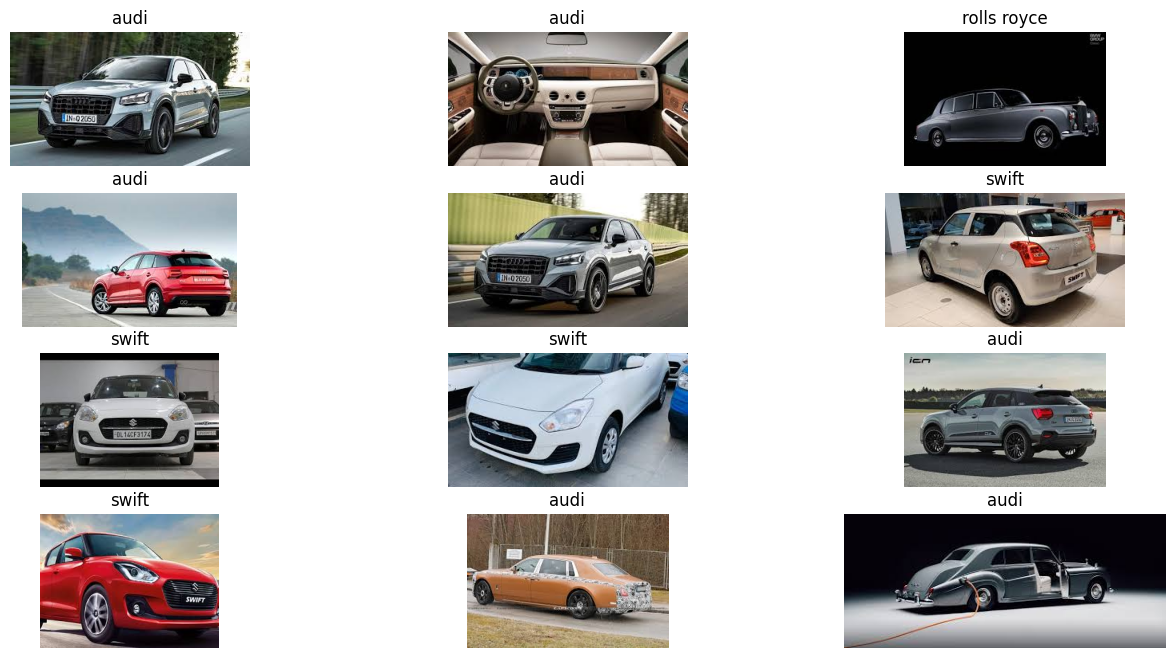

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
import os
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials

# Get the test images from the data/vision/test folder
test_folder_path = os.path.join('test image')
test_images = os.listdir(test_folder_path)

# Create an instance of the prediction service
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
custom_vision_client = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

# Create a figure to display the results
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes for each one
print('Classifying images in {} ...'.format(test_folder_path))
for i, test_image_name in enumerate(test_images):
    # Open the image, and use the custom vision model to classify it
    with open(os.path.join(test_folder_path, test_image_name), "rb") as image_file:
        classification = custom_vision_client.classify_image(project_id, model_name, image_file.read())
    # The results include a prediction for each tag, in descending order of probability - get the first one
    predicted_class = classification.predictions[0].tag_name
    # Display the image with its predicted class
    img = Image.open(os.path.join(test_folder_path, test_image_name))
    sub_plot = fig.add_subplot(int(len(test_images)/3), 3, i+1)
    sub_plot.axis('off')
    imgplot = plt.imshow(img)
    sub_plot.set_title(predicted_class)

# Show the plot
plt.show()
